In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

C:\Users\Ut Luom\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (35,43) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Ut Luom\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (34,42) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Kết hợp bộ train và bộ test lại thành một cho dễ xử lí

In [3]:
df_all = df_train.drop(['label'], 1).append(df_test)

In [4]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73411 entries, 0 to 20380
Columns: 194 entries, id to Field_82
dtypes: float64(133), int64(2), object(59)
memory usage: 109.2+ MB


In [5]:
df_train.head()

,id,label,Field_1,Field_2,Field_3,Field_4,Field_5,Field_6,Field_7,Field_8,...,partner5_H,partner5_K,partner5_L,brief,num_of_phone,Field_78,Field_79,Field_80,Field_81,Field_82
0,0,1,2019-07-24T03:39:02.854Z,2019-07-31T20:10:02Z,1.0,GH,2018-12-27,2018-12-27,2019-01-01,2019-07-31,...,0.0,0.0,0.0,cb1,1.0,NaN,NaN,NaN,NaN,1
1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,4,1.0,NaN,NaN,NaN,NaN,1
2,2,0,2019-01-17T07:15:26.367Z,2019-01-17T07:17:45Z,2.0,T1,2019-01-17,2019-01-17,2019-01-01,2019-12-31,...,0.0,0.0,0.0,1,1.0,33.0,10.769445,6.466667,0.0,2
3,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,1.0,33.0,10.769445,6.466667,0.0,3
4,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,1.0,33.0,10.769445,6.466667,0.0,3


In [6]:
df_test.head()

,id,Field_1,Field_2,Field_3,Field_4,Field_5,Field_6,Field_7,Field_8,Field_9,...,partner5_H,partner5_K,partner5_L,brief,num_of_phone,Field_78,Field_79,Field_80,Field_81,Field_82
0,53030,2019-10-14T01:37:41.959Z,2019-10-14T01:37:41.959Z,2.0,T1,8/27/2019,8/27/2019,9/24/2019,9/23/2020,8/27/2019,...,0.0,0.0,0.0,NaN,2.0,NaN,NaN,NaN,NaN,1
1,53031,2019-09-10T09:20:40.066Z,2019-09-11T07:53:44Z,2.0,T1,9/10/2019,9/10/2019,9/14/2019,9/13/2020,9/10/2019,...,0.0,0.0,0.0,notfound,1.0,NaN,NaN,NaN,NaN,1
2,53032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0,1.0,NaN,NaN,NaN,NaN,1
3,53033,2019-10-21T03:29:30.074Z,2019-10-21T04:17:26Z,2.0,T1,10/21/2019,10/21/2019,11/15/2019,11/14/2020,10/21/2019,...,0.0,0.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,1
4,53034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,3,1.0,27.0,NaN,27.0,27.0,1


In [7]:
df_all.head()

,id,Field_1,Field_2,Field_3,Field_4,Field_5,Field_6,Field_7,Field_8,Field_9,...,partner5_H,partner5_K,partner5_L,brief,num_of_phone,Field_78,Field_79,Field_80,Field_81,Field_82
0,0,2019-07-24T03:39:02.854Z,2019-07-31T20:10:02Z,1.0,GH,2018-12-27,2018-12-27,2019-01-01,2019-07-31,2018-12-27,...,0.0,0.0,0.0,cb1,1.0,NaN,NaN,NaN,NaN,1
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,4,1.0,NaN,NaN,NaN,NaN,1
2,2,2019-01-17T07:15:26.367Z,2019-01-17T07:17:45Z,2.0,T1,2019-01-17,2019-01-17,2019-01-01,2019-12-31,2019-01-17,...,0.0,0.0,0.0,1,1.0,33.0,10.769445,6.466667,0.0,2
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,1.0,33.0,10.769445,6.466667,0.0,3
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,1.0,33.0,10.769445,6.466667,0.0,3


# Nhóm I: DATE/ DATE TIME/ xxx_startDate/ xxx_endDate

Đó là toàn bộ những cột có giá trị là ngày tháng

In [8]:
#xử lí date và dateTime
Date = ['Field_{}'.format(i) for i in [5, 6, 7, 8, 9, 11, 15, 25, 33, 34, 35, 40]]
DateTime = ['Field_{}'.format(i) for i in [1, 2, 43, 44]]
df_all[Date + DateTime + ['Field_34', 'ngaySinh']].sample(10)
# sampl: ý nghĩa lấy bất cứ dòng nào có trong dataset

,Field_5,Field_6,Field_7,Field_8,Field_9,Field_11,Field_15,Field_25,Field_33,Field_34,Field_35,Field_40,Field_1,Field_2,Field_43,Field_44,Field_34,ngaySinh
14575,12/25/2018,12/25/2018,1/1/2019,12/31/2019,12/25/2018,NaN,NaN,12/25/2018,4/1/2020,20180101,NaN,1/1/2019,2018-12-25T13:03:29.435Z,2018-12-26T15:16:19Z,2016-12-31T14:25:43.73Z,2019-09-28T05:30:50Z,20180101,19900903.0
2717,2019-03-08,2019-03-08,2019-03-08,2019-12-31,2019-03-08,NaN,2019-03-08,2019-03-08,2020-10-08,20180601,NaN,2019-03-08,2019-03-08T08:08:19.708Z,2019-03-08T08:13:33Z,2017-01-20T10:35:28.78Z,2019-08-24T14:16:01Z,20180601,19870825.0
2965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18259,2019-12-10,2019-12-10,2019-12-10,2020-12-09,2019-12-10,NaN,NaN,2019-12-10,2021-12-10,20191207,NaN,2019-12-10,2019-12-10T03:46:02.67Z,2019-12-10T07:37:48Z,2018-12-10T04:07:01.983Z,2019-01-14T01:01:36.506Z,20191207,19860214.0
38102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289,2019-12-12,2019-12-12,2019-11-21,2020-11-20,2019-12-12,NaN,2019-12-12,2019-12-12,2021-11-21,20191143,NaN,2019-11-21,2019-12-12T01:42:21.365Z,2019-12-12T03:27:44Z,2017-01-21T09:38:20.59Z,2019-02-15T02:48:25.785Z,20191143,19860728.0
14933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#xử lí thằng Field_34
#hàm chung cho field_34 và ngaySinh
def process_field_34(x):
    if x != x:
        return np.nan
    try:
        x = int(x)
    except ValueError:
        x = x.split(' ')[0]
    
    return datetime.strptime(str(x)[:6], "%Y%m")

In [10]:
#xử lí feature date
#hàm chung cho đối tượng datetime(d-m-y)
def process_date(x):
    if x != x:
        return np.nan
    try:
        date_obj = datetime.strptime(x, '%m/%d/%Y')
    except:
        date_obj = datetime.strptime(x, '%Y-%m-%d')
    return date_obj

In [11]:
#xử lí feature datetime
# xử lí datetime có trong df_all mà có dạng T & Z
def process_datetime(x):
    if x != x:
        return np.nan
    x = x.split('.')[0]
    
    if x[-1] == 'Z':
        x = x[:-1]
    date, time = x.split('T')
    datetime_obj = datetime.strptime(x, "%Y-%m-%dT%H:%M:%S")
    return datetime_obj

In [12]:
# Xử lí nhóm thứ nhất
def process_nhom_I_cols(df):
    cat_cols = []
    for col in Date:
        if col == 'Field_34':
            continue
        df[col] = df[col].apply(process_date) #gọi lại hàm xử lí đối tượng 'date'
        
    for col in DateTime:
        df[col] = df[col].apply(process_datetime) #gọi lại hàm xử lí 'datetime'
 
    df['Field_34'] = df['Field_34'].apply(process_field_34) #gọi lại hàm xử lí 'field_34'
    df['ngaySinh'] = df['ngaySinh'].apply(process_field_34)
    cat_cols += Date + DateTime
    for col in Date + DateTime:
        df[col] = df[col].dt.strftime('%m-%Y')
    
    # các cọt có ngày tháng năm có trong _startDate và _endDate
    for cat in ['F', 'E', 'C', 'G', 'A']:
        df[f'{cat}_startDate'] = pd.to_datetime(df[f"{cat}_startDate"], infer_datetime_format=True)
        df[f'{cat}_endDate'] = pd.to_datetime(df[f"{cat}_endDate"], infer_datetime_format=True)
        
        df[f'{cat}_startDate'] = df[f'{cat}_startDate'].dt.strftime('%m-%Y')
        df[f'{cat}_endDate'] = df[f'{cat}_endDate'].dt.strftime('%m-%Y')
        
        cat_cols.append(f'{cat}_startDate')
        cat_cols.append(f'{cat}_endDate')
    
    for col in cat_cols:
        df[col] = df[col].astype('category')
    
    return df

# Nhóm thứ II: xLocationId, xcountry, xstate,...

In [13]:

# Trong nhóm II có 6 cột thỏa mãn: CJ, CK, CL, CM, CN, CO (số)
# Có nhiều số 0 trong các cột này (dựa vào tableu) gây nhiễu, loại bỏ
def prepare_process_II(df):
    df = str(df).strip().lower()
    df = re.sub(' +', ' ', df)
    return df

def process_II_cols(df):
    for col in ['currentLocationLocationId', 'currentLocationLatitude', 'currentLocationLongitude',
                'homeTownLocationId', 'homeTownLatitude', 'homeTownLongitude']:
        df[col].replace(0, np.nan, inplace=True)
    df['currentLocationLocationId'] = df['currentLocationLocationId'].apply(prepare_process_II).astype('category')
    df['homeTownLocationId'] = df['homeTownLocationId'].apply(prepare_process_II).astype('category')
    return df

# Xử lí nhóm III: maCv và diaChi

In [14]:
def prepare_process_III(df):
    df = str(df).strip().lower()
    df = re.sub(' + ', ' ', df)
    return df

xem tableu như thế nào

In [15]:
def job_category(x):
    if type(x) == str:
        if "công nhân" in x or "cnv" in x or "cn" in x or "may công nghiệp" in x or "lao động" in x\
        or "thợ" in x or "coõng nhaõn trửùc tieỏp maựy may coõng nghieọp" in x or "c.n" in x or "lđ" in x\
        or "CN" in x or "CNhân" in x or "Cnhân" in x or "CNV" in x:
            return "CN"
        elif "giáo viên" in x or "gv" in x or "gíao viên" in x:
            return "GV"
        elif "nhân viên" in x or "kế toán" in x or "cán bộ" in x or "nv" in x or "cb" in x or "nhõn viờn" in x:
            return "NV"
        elif "tài xế" in x or "lái" in x or "tài xê" in x:
            return "TX"
        elif "quản lý" in x or "phó phòng" in x or "hiệu phó" in x:
            return "QL"
        elif "undefined" in x:
            return "missing"
        elif "giám đốc" in x or "hiệu trưởng" in x:
            return "GĐ"
        elif "phục vụ" in x:
            return "PV"
        elif "chuyên viên" in x:
            return  "CV"
        elif "bác sĩ" in x or "dược sĩ" in x or "y sĩ" in x or "y sỹ" in x:
            return "BS"
        elif "y tá" in x:
            return "YT"
        elif "hộ sinh" in x:
            return "HS"
        elif "chủ tịch" in x:
            return "CT"
        elif "bếp" in x:
            return "ĐB"
        elif "sư" in x:
            return "KS"
        elif "dưỡng" in x:
            return "ĐD"
        elif "kỹ thuật" in x or "kĩ thuật" in x:
            return "KTV"
        elif "diễn viên" in x:
            return "DV"
        else:
            return "missing"
    else:
        return x
    
def process_III_cols(df):
    df["maCv"] = df["maCv"].apply(prepare_process_III).apply(job_category).astype("category")
    return df

# Xử lí nhóm IV: gioiTinh, info_social_sex

In [16]:
#Gộp hai nhóm này lại để giảm bớt trường hợp thiếu
#hàm kết nối hai feature trên thành lại một feature có tên là "Giới Tính"
def prepare_process_IV(df):
    x, y = df
    if x != x and y != y:
        return 'nan'
    if x != x:
        return y.lower()
    return x.lower()

def process_IV_cols(df):
    df["Giới Tính"] = df[['gioiTinh', 'info_social_sex']].apply(prepare_process_IV, axis=1).astype('category')
    return df

# Xử lí nhóm V: các cột còn lại

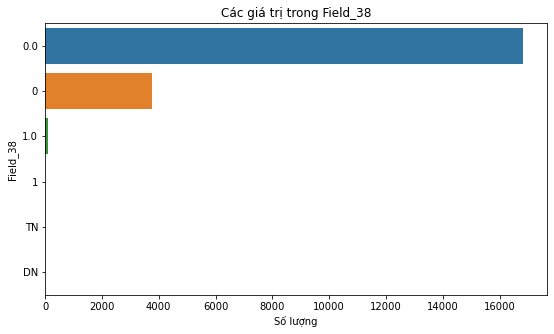

In [66]:
#Xem lại Field_38
plt.subplots(figsize=(9,5))
sns.countplot(y="Field_38", data=df_train,order=df_train["Field_38"].value_counts().index)
plt.title("Các giá trị trong Field_38")
plt.xlabel("Số lượng")
plt.show();

In [18]:
def prepare_process_V(df):
    df = str(df).strip().lower()
    df = re.sub(' + ', ' ', df)
    return df

def process_V_cols(df):
    # mã hóa lại các cột sau:
    df['Field_62'] = df['Field_62'].map({'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5})
    df['Field_47'] = df['Field_47'].map({'Zezo': 0, 'One': 1, 'Tw0': 2, 'Three': 3, 'Four': 4})
    
    # xử lí các cột có nhiều số 0.0
    df["Field_27"] = df["Field_27"].replace({0.0: np.nan})
    df["Field_28"] = df["Field_28"].replace({0.0: np.nan})
    df["Field_19"] = df["Field_19"].replace({0.0: np.nan})
    df["Field_29"] = df["Field_29"].replace({0.0: np.nan})
    
    # xử lí biến categorical
    df['friendCount'] = df['friendCount'].replace(0.0, np.nan, inplace=True)
    df['subscriberCount'] = df['subscriberCount'].replace(0.0, np.nan, inplace=True)
    
    #xử lí field_38
    df['Field_38'] = df['Field_38'].map({0: 0.0, 1: 1.0, 'DN': np.nan, 'TN': np.nan })
    
    for col in df.columns:
        if df[col].dtype.name == 'object':
            df[col] = df[col].apply(prepare_process_V).astype('category')
    
    return df

In [67]:
#Drop những cột không cần thiết
drop = ['Field_14', 'Field_16', 'Field_17', 'Field_24', 'Field_26', 'Field_30', 'Field_31', 'Field_37', 'Field_52',
        'Field_57', 'partner0_B', 'partner0_K', 'partner0_L', 'partner1_B', 'partner1_D', 'partner1_E', 'partner1_F',
        'partner1_K', 'partner1_L', 'partner2_B', 'partner2_G', 'partner2_K', 'partner2_L', 'partner3_B', 'partner3_F',
        'partner3_G', 'partner3_H', 'partner3_K', 'partner3_L', 'partner4_A', 'partner4_B', 'partner4_C', 'partner4_D',
        'partner4_E', 'partner4_F', 'partner4_G', 'partner4_H', 'partner4_K', 'partner4_L', 'partner5_B', 'partner5_C',
        'partner5_H', 'partner5_K', 'partner5_L', 'Field_34', 'info_social_sex', 'data.basic_info.locale', 'homeTownCountry',
        'Field_2', 'Field_5', 'Field_49', 'Field_9', 'gioiTinh', 'ngaySinh', 'namSinh']

def transform(df):
    df = process_nhom_I_cols(df)
    df = process_II_cols(df)
    df = process_III_cols(df)
    df = process_IV_cols(df)
    df = process_V_cols(df)
    return df.drop(drop, 1)

In [20]:
# kết nối lại tất cả các feature lại với nhau
df_all_feature = transform(df_all.copy())

In [21]:
df_all_feature.shape

(73411, 140)

sau khi kết nối lại với nhau thì chỉ còn lại 140 cột so với 194 lúc ban đầu

In [22]:
df_all_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73411 entries, 0 to 20380
Columns: 140 entries, id to Giới Tính
dtypes: category(52), float64(86), int64(2)
memory usage: 60.2 MB


#  Handling Missing Values 

kiểm tra xem có bao nhiêu feature bị thiếu data

In [23]:
def missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_per = 100 * mis_val/len(df)
    mis_val_table = pd.concat([mis_val, mis_val_per], axis = 1)
    mis_val_table_re = mis_val_table.rename(
                        columns = {
                            0: "Thiếu",
                            1: "Chiếm %"
                        })
    #sắp xếp theo tỉ lệ giảm dần
    mis_val_table_re = mis_val_table_re[mis_val_table_re.iloc[:, 1] != 0].sort_values("Chiếm %", ascending=False).round(1)
    print("Có tất cả " + str(df.shape[1]) + " cột.\n"
          "Có tất cả " + str(mis_val_table_re.shape[0]) + " cột bị thiếu data")
    return mis_val_table_re

In [24]:
missing = missing_values(df_all_feature)
missing

Có tất cả 140 cột.
Có tất cả 108 cột bị thiếu data


,Thiếu,Chiếm %
Field_28,70632,96.2
Field_27,70524,96.1
Field_19,69307,94.4
Field_35,64202,87.5
Field_11,63438,86.4
...,...,...
partner0_F,7395,10.1
partner0_E,7395,10.1
partner0_D,7395,10.1
partner2_C,7395,10.1


In [25]:
"Phân loại các cột dữ liệu theo kiểu"
numeric_cols = df_all_feature.select_dtypes(['float', 'int']).columns
categoric_cols = df_all_feature.select_dtypes('object').columns

In [26]:
numeric_cols

Index(['Field_3', 'Field_10', 'Field_13', 'Field_19', 'Field_20', 'Field_21',
       'Field_22', 'Field_23', 'Field_27', 'Field_28', 'Field_29', 'Field_38',
       'Field_39', 'Field_41', 'Field_42', 'Field_47', 'Field_50', 'Field_51',
       'Field_53', 'Field_58', 'Field_59', 'Field_60', 'Field_62', 'Field_63',
       'Field_64', 'Field_67', 'Field_69', 'Field_70', 'Field_71', 'Field_72',
       'Field_73', 'Field_74', 'Field_75', 'Field_76', 'Field_77',
       'currentLocationLatitude', 'currentLocationLongitude',
       'homeTownLatitude', 'homeTownLongitude', 'topFriends', 'numOrg',
       'F_numOrg', 'F_numQuery', 'E_numOrg', 'E_numQuery', 'C_numOrg',
       'C_numQuery', 'G_numOrg', 'G_numQuery', 'A_numOrg', 'A_numQuery',
       'summary_6m', 'summary_3m', 'summary_1m', 'summary_1w', 'partner0_A',
       'partner0_C', 'partner0_D', 'partner0_E', 'partner0_F', 'partner0_G',
       'partner0_H', 'partner1_A', 'partner1_C', 'partner1_G', 'partner1_H',
       'partner2_A', 'partner2

In [27]:
numeric_cols = df_all_feature.select_dtypes(include = ["int", "float"] ).columns

In [28]:
numeric_cols

Index(['Field_3', 'Field_10', 'Field_13', 'Field_19', 'Field_20', 'Field_21',
       'Field_22', 'Field_23', 'Field_27', 'Field_28', 'Field_29', 'Field_38',
       'Field_39', 'Field_41', 'Field_42', 'Field_47', 'Field_50', 'Field_51',
       'Field_53', 'Field_58', 'Field_59', 'Field_60', 'Field_62', 'Field_63',
       'Field_64', 'Field_67', 'Field_69', 'Field_70', 'Field_71', 'Field_72',
       'Field_73', 'Field_74', 'Field_75', 'Field_76', 'Field_77',
       'currentLocationLatitude', 'currentLocationLongitude',
       'homeTownLatitude', 'homeTownLongitude', 'topFriends', 'numOrg',
       'F_numOrg', 'F_numQuery', 'E_numOrg', 'E_numQuery', 'C_numOrg',
       'C_numQuery', 'G_numOrg', 'G_numQuery', 'A_numOrg', 'A_numQuery',
       'summary_6m', 'summary_3m', 'summary_1m', 'summary_1w', 'partner0_A',
       'partner0_C', 'partner0_D', 'partner0_E', 'partner0_F', 'partner0_G',
       'partner0_H', 'partner1_A', 'partner1_C', 'partner1_G', 'partner1_H',
       'partner2_A', 'partner2

In [29]:
categoric_cols = df_all_feature.select_dtypes(include = ["object"]).columns
categoric_cols

Index([], dtype='object')

In [65]:
#fill mising cho loại categoric sử dụng MODE
def fill_mode_train(categoric_cols):
    for col in categoric_cols.columns:
        mode = categoric_cols[col].mode().iloc[0]
        categoric_cols[col] = categoric_cols[col].fillna(mode)
    return categoric_cols
categoric_cols = fill_mode_train(categoric_cols)

AttributeError: 'Index' object has no attribute 'columns'

In [30]:
def missing_numeric(df):
    numeric_cols = df_all_feature.select_dtypes(include = ["int", "float"] ).columns
    for i in numeric_cols:
        df[i] = df[i].fillna(df[i].median())
    return df

def missing_categoric(df):
    categoric_cols = df_all_feature.select_dtypes(include = ["object"]).columns
    for i in categoric_cols:
        df[i] = df[i].fillna(df[f].mode()[0])
    return df

def transform_feature(df):
    df = missing_numeric(df)
    df = missing_categoric(df)
    return df

In [31]:
df_all_fe = transform_feature(df_all_feature)

In [32]:
df_all_fe.head()

,id,Field_1,Field_3,Field_4,Field_6,Field_7,Field_8,Field_10,Field_11,Field_12,...,partner5_F,partner5_G,brief,num_of_phone,Field_78,Field_79,Field_80,Field_81,Field_82,Giới Tính
0,0,07-2019,1.0,gh,12-2018,01-2019,07-2019,1.0,07-2019,g8,...,0.0,0.0,cb1,1.0,16.0,17.039171,1.550000,0.0,1,male
1,1,NaN,2.0,nan,NaN,NaN,NaN,1.0,NaN,nan,...,0.0,0.0,4,1.0,16.0,17.039171,1.550000,0.0,1,nan
2,2,01-2019,2.0,t1,01-2019,01-2019,12-2019,1.0,NaN,nan,...,0.0,0.0,1,1.0,33.0,10.769445,6.466667,0.0,2,female
3,3,NaN,2.0,nan,NaN,NaN,NaN,1.0,NaN,nan,...,0.0,0.0,1,1.0,33.0,10.769445,6.466667,0.0,3,nan
4,4,NaN,2.0,nan,NaN,NaN,NaN,1.0,NaN,nan,...,0.0,0.0,1,1.0,33.0,10.769445,6.466667,0.0,3,nan


In [33]:
df_all_fe.columns

Index(['id', 'Field_1', 'Field_3', 'Field_4', 'Field_6', 'Field_7', 'Field_8',
       'Field_10', 'Field_11', 'Field_12',
       ...
       'partner5_F', 'partner5_G', 'brief', 'num_of_phone', 'Field_78',
       'Field_79', 'Field_80', 'Field_81', 'Field_82', 'Giới Tính'],
      dtype='object', length=140)

In [34]:
df_all_fe.isnull().sum()

id               0
Field_1      38787
Field_3          0
Field_4          0
Field_6      38810
             ...  
Field_79         0
Field_80         0
Field_81         0
Field_82         0
Giới Tính        0
Length: 140, dtype: int64

In [35]:
missing_all = missing_values(df_all_fe)

Có tất cả 140 cột.
Có tất cả 22 cột bị thiếu data


In [36]:
missing_all

,Thiếu,Chiếm %
Field_35,64202,87.5
Field_11,63438,86.4
Field_15,52278,71.2
Field_40,45358,61.8
C_startDate,43699,59.5
C_endDate,43699,59.5
Field_33,41838,57.0
F_startDate,39602,53.9
F_endDate,39602,53.9
G_endDate,39314,53.6


có 22 cột còn thiếu, đây là những feature nằm hoàn toàn trong nhóm I

In [46]:
df_fe = df_all_fe.copy()
df_fe.replace([np.inf, -np.inf], 999, inplace=True)

for col in df_fe.columns:
    if df_fe[col].dtype.name == "category":
        if df_fe[col].isnull().sum() > 0:
            df_fe[col] = df_fe[col].cat.add_categories(f'missing_{col}')
            df_fe[col].fillna(f'missing_{col}', inplace=True)
    else:
        df_fe[col].fillna(-1, inplace=True)

y_label = df_train["label"]
train_fe = df_fe[df_fe["id"] < df_train.shape[0]]
test_fe = df_fe[df_fe["id"] >= df_train.shape[0]]

print(train_fe.shape)
print(test_fe.shape)

(53030, 140)
(20381, 140)


# Scaling numerical Feature

encode numeric

In [47]:
from sklearn.preprocessing import MinMaxScaler

def encode(df):
    scaler = MinMaxScaler()
    numerical = df_all_fe.select_dtypes(include = ['int', 'float']).columns
    feature_transform = pd.DataFrame(data=df)
    feature_transform[numerical] = scaler.fit_transform(df[numerical])
    display(feature_transform.head(n = 5))
    return df

df_all_fe = encode(df_all_fe)

,id,Field_1,Field_3,Field_4,Field_6,Field_7,Field_8,Field_10,Field_11,Field_12,...,partner5_F,partner5_G,brief,num_of_phone,Field_78,Field_79,Field_80,Field_81,Field_82,Giới Tính
0,0,07-2019,0.0,gh,12-2018,01-2019,07-2019,0.2,07-2019,g8,...,0.0,0.0,cb1,0.0,0.585321,0.047342,0.562939,0.582456,1,male
1,1,NaN,1.0,nan,NaN,NaN,NaN,0.2,NaN,nan,...,0.0,0.0,4,0.0,0.585321,0.047342,0.562939,0.582456,1,nan
2,2,01-2019,1.0,t1,01-2019,01-2019,12-2019,0.2,NaN,nan,...,0.0,0.0,1,0.0,0.616514,0.029922,0.572027,0.582456,2,female
3,3,NaN,1.0,nan,NaN,NaN,NaN,0.2,NaN,nan,...,0.0,0.0,1,0.0,0.616514,0.029922,0.572027,0.582456,3,nan
4,4,NaN,1.0,nan,NaN,NaN,NaN,0.2,NaN,nan,...,0.0,0.0,1,0.0,0.616514,0.029922,0.572027,0.582456,3,nan


encode categorical

In [48]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_count = 0


for col in df_all_fe:
    if df_all_fe[col].dtype == 'object':
        if len(list(df_all_fe[col].unique())) <= 2:
            le.fit(df_all_fe[col])
            df_all_fe[col] = le.transform(df_all_fe[col])
            le_count += 1
           
print('%d columns were label encoded.' % le_count)

0 columns were label encoded.


# Modelling

In [60]:
#Căn chỉnh 2 bộ data

ntrain = df_train.shape[0]
ntest = df_test.shape[0]


train = df_all_fe[:ntrain]
test = df_all_fe[ntrain:]
print(train_fe.shape)
print(test_fe.shape)

y_train = df_train.label.values

(53030, 140)
(20381, 140)


In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(train, y_train, test_size=0.3, random_state=200)
print("X Training shape", X_train.shape)
print("X Test shape", X_test.shape)
print("y Training shape", Y_train.shape)
print("y Test shape", Y_test.shape)

X Training shape (37121, 140)
X Test shape (15909, 140)
y Training shape (37121,)
y Test shape (15909,)


import thư viện cho model

In [56]:
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb

In [64]:
model = LogisticRegression(random_state=0)
model.fit(X_train, Y_train)

Y_predict = model.predict_proba(X_test)[:, 1]

print('Train/Test split results:')
print("ROC",  roc_auc_score(Y_test, Y_predict))

ValueError: could not convert string to float: 'female'